LOAN DEFAULT PREDICTION...

In [45]:

import pandas as pd
import numpy as np

df = pd.read_csv("Loan_default.csv")
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


EARLY INSIGHTS OF DEFAULT BORROWERS...

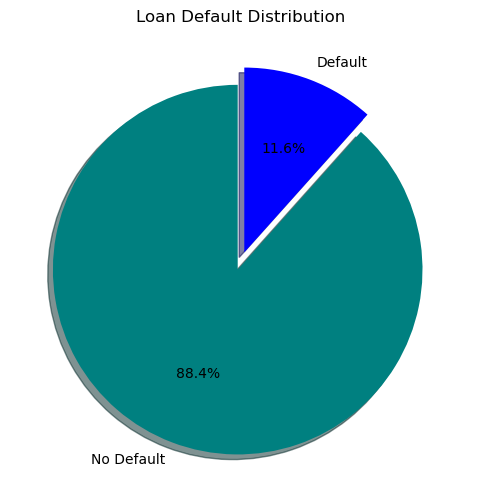

In [68]:
import matplotlib.pyplot as plt
default_counts = df['Default'].value_counts()
labels = ['No Default', 'Default']
colors = ['teal', 'blue']
explode = (0.05, 0.05)

plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title("Loan Default Distribution")
plt.show()

FEATURE ENGINEERING...

In [46]:
#remove unnecessary columns
df = df.drop('LoanID', axis=1)


# To check the percentage of missing data like NAN
missing_percent = df.isnull().mean()

# Drop the columns having more than 50% missing values
cols_to_drop = missing_percent[missing_percent > 0.5].index
df = df.drop(columns=cols_to_drop)

# Filling the missing values correctly with the median of the column values.
for col in df.columns:
    if col == 'Default':          
        continue
    
    if df[col].dtype in ['int64', 'float64']:   
        df[col] = df[col].fillna(df[col].median())
    else:                                       
        df[col] = df[col].fillna(df[col].mode()[0])

df.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [47]:
df.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [48]:
if {'LoanAmount', 'Income'}.issubset(df.columns):
    df['loan_to_income_ratio'] = df['LoanAmount'] / (df['Income'] + 1) #creating new column(loan_to_income_ratio)

df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,loan_to_income_ratio
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,0.588255
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,2.467432
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,1.534135
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,1.412594
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,0.447157


In [49]:

# It convert all object columns(has yes/no or any alphabets) to category and then to numeric codes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes


df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,loan_to_income_ratio
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,0.588255
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,2.467432
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,1.534135
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,1.412594
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,0.447157


In [50]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=['float64','int64']).columns
feature_cols = numeric_cols.drop('Default')

# Scale only the features
df[feature_cols] = scaler.fit_transform(df[feature_cols])

df.head()



,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,loan_to_income_ratio
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1,0,-0.729562
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1,0,0.133139
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0,1,-0.295323
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0,0,-0.351121
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0,0,-0.794338


MODEL TRAINING...

In [51]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='Default')
y=df["Default"]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,loan_to_income_ratio
151646,1.434381,0.262806,0.753694,1.124806,-0.217704,0.446694,-1.462047,-0.708685,1.601395,3,1,0,1,0,0,1,-0.103773
193529,1.234250,0.294657,-0.127679,0.596183,-1.689849,-1.343791,0.067390,-0.708685,1.341560,0,2,1,1,0,4,1,-0.420598
140818,-0.300083,1.165869,-0.716071,-0.857529,-1.025941,0.446694,0.728890,-0.001526,-1.689843,1,1,0,0,0,1,0,-0.723824
165537,-0.433503,-0.581535,-0.815731,-0.731666,-0.650688,-0.448549,-1.394240,-0.708685,-1.170174,3,1,2,1,0,3,0,-0.464204
84290,0.833990,1.367497,1.461679,1.307307,-1.458925,-1.343791,-1.722729,0.705634,-0.477282,3,0,1,1,1,3,0,-0.218178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,-0.099952,-1.598578,-1.363976,1.124806,0.070952,-0.448549,-0.934655,-0.708685,1.558089,2,3,1,0,0,2,0,-0.296653
117952,0.567149,-0.336789,1.469358,-0.505114,-0.131107,1.341937,1.135735,-0.708685,1.081726,2,1,1,0,1,4,0,0.533367
173685,0.700569,0.597868,-0.248584,0.514373,-1.632118,-1.343791,-0.069732,-1.415845,0.951808,3,2,0,1,0,4,1,-0.522424
43567,1.034120,-1.395898,-1.098888,0.218596,-0.419763,-1.343791,-1.374651,-0.708685,1.168337,0,3,2,1,0,0,0,-0.187454


In [52]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
91816     0
140989    0
57275     0
130235    0
244648    0
         ..
25404     0
231940    0
184407    0
60091     0
46022     0
Name: Default, Length: 51070, dtype: int64


In [54]:
print(y_pred)
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


GETTING ACCURACY...

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ---- Random Forest ----
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("\n✅ Model training and testing complete!")


=== Logistic Regression ===
Accuracy: 0.8846289406696691
[[44801   261]
 [ 5631   377]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45062
           1       0.59      0.06      0.11      6008

    accuracy                           0.88     51070
   macro avg       0.74      0.53      0.53     51070
weighted avg       0.85      0.88      0.84     51070


=== Random Forest ===
Accuracy: 0.8843352261601723
[[44858   204]
 [ 5703   305]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45062
           1       0.60      0.05      0.09      6008

    accuracy                           0.88     51070
   macro avg       0.74      0.52      0.52     51070
weighted avg       0.85      0.88      0.84     51070


✅ Model training and testing complete!


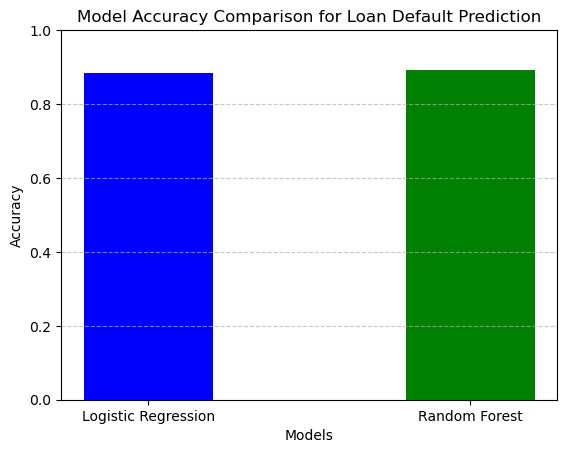

In [62]:

models = ['Logistic Regression', 'Random Forest']
accuracies = [0.885, 0.892]

plt.bar(models, accuracies, color=['blue', 'green'],width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Loan Default Prediction')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [58]:
# Taking first row from my dataset
sample_row = X_test.iloc[0]  
sample_array = sample_row.values.reshape(1, -1)  # converting to 2D array for prediction

# Show the sample data
print("Sample input data (features):")
print(sample_row)

# Predict
pred = rf.predict(sample_array)
print("\nPrediction:", "Default" if pred[0] == 1 else "No Default")


Sample input data (features):
Age                     0.833990
Income                  0.697168
LoanAmount             -0.290100
CreditScore            -0.479941
MonthsEmployed         -1.458925
NumCreditLines          0.446694
InterestRate            0.751492
LoanTerm               -1.415845
DTIRatio               -0.217447
Education               1.000000
EmploymentType          2.000000
MaritalStatus           1.000000
HasMortgage             1.000000
HasDependents           1.000000
LoanPurpose             0.000000
HasCoSigner             0.000000
loan_to_income_ratio   -0.551571
Name: 91816, dtype: float64

Prediction: No Default


C:\Users\ROHIT GUPTA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
